# Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
# Project planning

# Understanding the data: .info(), .describe()
    # What are categorical/ numerical features
    # Box plot
    # is there anything we need to scale?
    # skewness, label, limits outliers?
    # Any Missing data?
# Correlation between data -> heat map
# Explore interesting themes? different hypothesis -> visualisation
# Feature engineering: combine some features?
# Data preprocessing: feature scaling/ encoding

# Modeling
# Base Model
# Fine tuning the model

# Gather the Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_target = train['Survived']
train['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([train, test])

# Understand the Data

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [7]:
# Quick look at the datatype and find out if there is any missing data.
# Name, Sex, Ticket, Cabin, Embarked are categorical data.
# Age, Cabin, Embarked contain missing data.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [8]:
# Better understanding in the numberical data

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [9]:
numerical_df = train[['Age','SibSp','Parch','Fare']]
categorical_df = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

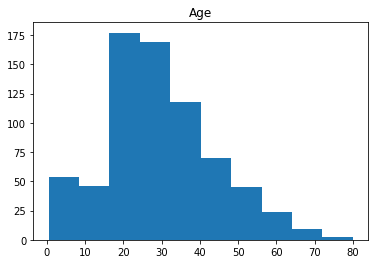

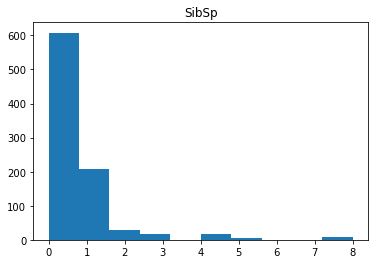

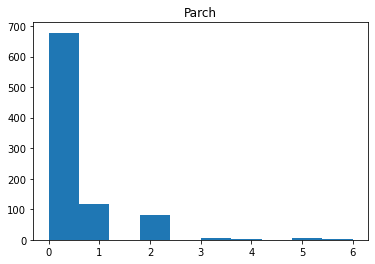

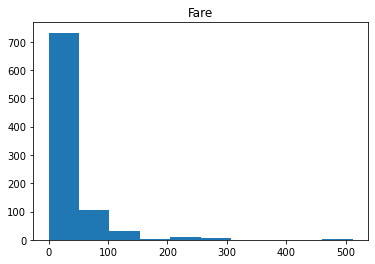

In [10]:
# Simple histogram plot on numerical features

for feature in numerical_df.columns:
    plt.hist(numerical_df[feature])
    plt.title(feature)
    plt.show()
    
# Except age, which is nearly normally distributed
# All others numerical features requires feature scaling

In [11]:
numerical_df.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


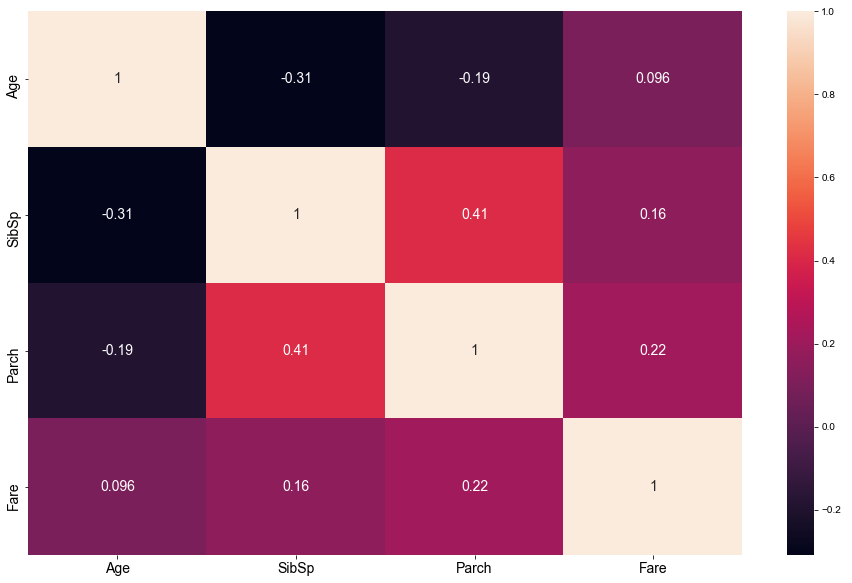

In [12]:
# heatmap

plt.figure(figsize=(16, 10))
sns.heatmap(numerical_df.corr(),annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

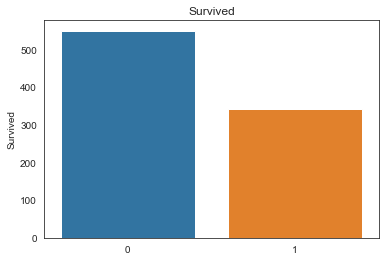

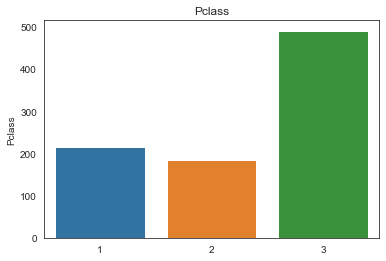

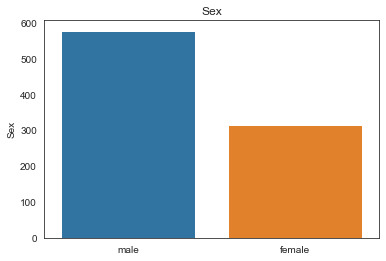

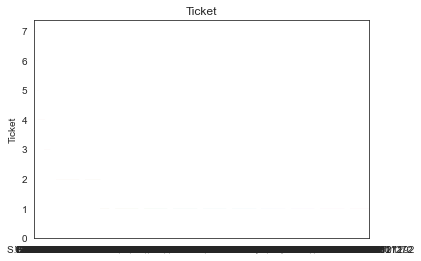

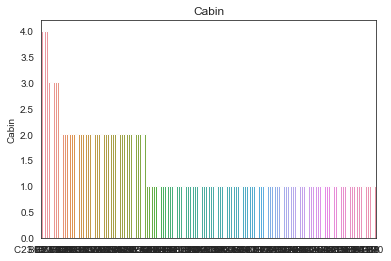

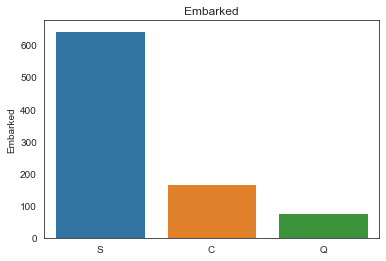

In [13]:
for i in categorical_df.columns:
    sns.barplot(x=categorical_df[i].value_counts().index, y=categorical_df[i].value_counts()).set_title(i)
    plt.show()

# Histogram of categorical features
# there are too many types of tickets and cabin, we need to do some feature engineering

In [14]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')
# The survival rate is higher in Pclass 1 than 3

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [15]:
pd.pivot_table(train, index='Survived', columns = 'Sex', values='Ticket', aggfunc='count')
# The survival rate is higher for female than male

Sex,female,male
Survived,,
0,81,468
1,233,109


In [16]:
pd.pivot_table(train, index='Survived', columns = 'Embarked', values='Ticket', aggfunc='count')
# The survival rate is who embarked from S is much lower

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


# Feature Engineering

In [17]:
#Cabin -> Deck

train['deck'] = categorical_df.Cabin.str.split('').str[1]
train['deck'].fillna('X', inplace=True)
pd.pivot_table(train, index='deck', columns='Pclass', values='Ticket', aggfunc='count')

#We can see A, B, C deck only for 1st class passenger
#D, E are for all classes
#F, G are for 2nd and 3rd class
#all x are missing data

Pclass,1,2,3
deck,,,
A,15.0,NaN,NaN
B,47.0,NaN,NaN
C,59.0,NaN,NaN
D,29.0,4.0,NaN
E,25.0,4.0,3.0
F,NaN,8.0,5.0
G,NaN,NaN,4.0
T,1.0,NaN,NaN
X,40.0,168.0,479.0


In [18]:
train['deck'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: deck, dtype: int64

In [19]:
pd.pivot_table(train, index='Survived', columns='deck', values='Ticket', aggfunc='count')

#We can see people in the 1st class decks have a higher chance of survival

deck,A,B,C,D,E,F,G,T,X
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [20]:
# ticket -> numeric ticket or not

train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [21]:
pd.pivot_table(train, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [22]:
#name -> title
#most title are mr, miss, mrs and master

train['title'] = train.Name.str.split(',').str[1].str.split('.').str[0]
train['title']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: title, Length: 891, dtype: object

In [23]:
train['title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 Jonkheer          1
 the Countess      1
 Capt              1
 Don               1
 Ms                1
 Lady              1
 Sir               1
Name: title, dtype: int64

# Data preprocessing

In [24]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [25]:
#Apply changes in feature engineering section

all_data['deck'] = all_data.Cabin.str.split('').str[1]
all_data['deck'].fillna('X', inplace=True)

all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['title'] = all_data.Name.str.split(',').str[1].str.split('.').str[0]

In [26]:
#Missing data
all_data['Age'].fillna(train['Age'].median(), inplace=True)
all_data['Fare'].fillna(train['Fare'].median(), inplace=True)
all_data.dropna(subset=['Embarked'],inplace = True)

In [27]:
all_data.Pclass = all_data.Pclass.astype(str)

In [28]:
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp',
                                       'Parch','Fare','Embarked','deck',
                                       'numeric_ticket','title','train_test']])

In [29]:
# Split the data back to train and test
X_train = all_dummies[all_dummies['train_test']==1]
X_test = all_dummies[all_dummies['train_test']==0]

y_train = all_data[all_data['train_test']==1].Survived

In [30]:
X_train = X_train.drop('train_test', axis=1)
X_test = X_test.drop('train_test', axis=1)

In [31]:
# Standardscaling 
from sklearn.preprocessing import StandardScaler

col_names = ['Age', 'SibSp', 'Parch', 'Fare', 'numeric_ticket']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train[col_names])
X_test_new = sc.transform(X_test[col_names])
X_train_scaled[col_names] = X_train_new
X_test_scaled[col_names] = X_test_new

In [32]:
X_train_scaled.head()

,Age,SibSp,Parch,Fare,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,-0.563674,0.431350,-0.474326,-0.500240,-1.692695,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.669217,0.431350,-0.474326,0.788947,-1.692695,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.255451,-0.475199,-0.474326,-0.486650,-1.692695,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0.438050,0.431350,-0.474326,0.422861,0.590774,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.438050,-0.475199,-0.474326,-0.484133,0.590774,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


# Modeling

In [33]:
#Base Models
#LR

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=2000)
lr_score = cross_val_score(lr_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(lr_score)
lr_score.mean()

[0.8258427  0.81460674 0.80337079 0.82022472 0.85875706]


0.8245604011934236

In [34]:
#SVC

from sklearn.svm import SVC

svc_clf = SVC(gamma='auto')
svc_score = cross_val_score(svc_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(svc_score)
svc_score.mean()

[0.84269663 0.8258427  0.82022472 0.79775281 0.85875706]


0.8290547832158953

In [35]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_score = cross_val_score(tree_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(tree_score)
tree_score.mean()

[0.75842697 0.76404494 0.8258427  0.74157303 0.79661017]


0.7772995619881928

In [36]:
#KNeighbor

from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier()
neigh_score = cross_val_score(neigh_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(neigh_score)
neigh_score.mean()

[0.79775281 0.80898876 0.8258427  0.82022472 0.84180791]


0.818923379673713

In [37]:
#Randomforest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_score = cross_val_score(forest_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(forest_score)
forest_score.mean()

[0.83146067 0.76966292 0.84269663 0.74157303 0.83050847]


0.8031803466006476

In [38]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_score = cross_val_score(ada_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(ada_score)
ada_score.mean()

[0.76404494 0.78651685 0.80898876 0.81460674 0.84745763]


0.8043229860978862

In [39]:
#XGB

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_score = cross_val_score(xgb_clf, X_train_scaled, y_train, cv=5)
print(xgb_score)
xgb_score.mean()

[22:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8324065257411286

# Fine Tuning

In [40]:
def model_performance(classifier, model_name):
    print(model_name)
    print('Best Score:', classifier.best_score_)
    print('Best Params:', classifier.best_params_)

In [41]:
#LR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001,0.01,0.1,1,10,100,1000],
              'max_iter': [2000],
              'solver': ['liblinear']}
lr_grid_clf = GridSearchCV(lr, param_grid=param_grid, verbose=1)
lr_grid_clf.fit(X_train_scaled, y_train)

model_performance(lr_grid_clf, 'Logistic Regression')


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Logistic Regression
Best Score: 0.8279438837046911
Best Params: {'C': 1000, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


In [43]:
#SVC

svc = SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [0.1,0.5,1,2,5,10], 'C': [0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
              {'kernel': ['poly'], 'degree' : [2,3,4], 'C': [0.1, 1, 10, 100]}] 
            
svc_grid_clf = GridSearchCV(svc, param_grid=param_grid, verbose=True)
svc_grid_clf.fit(X_train_scaled, y_train)

model_performance(svc_grid_clf, 'SVC')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVC
Best Score: 0.8346918047356059
Best Params: {'C': 1, 'degree': 2, 'kernel': 'poly'}


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.6s finished


In [44]:
#Decision Tree

tree = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
               'max_depth': [2, 4, 6, 8, 10, 12]}

tree_grid_clf = GridSearchCV(tree, param_grid=param_grid, verbose=True)
tree_grid_clf.fit(X_train_scaled, y_train)

model_performance(tree_grid_clf, 'Decision Tree')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Decision Tree
Best Score: 0.8234368056878056
Best Params: {'criterion': 'gini', 'max_depth': 4}


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


In [45]:
#KNeighbor

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

knn_grid_clf = GridSearchCV(knn, param_grid=param_grid, verbose=True)
knn_grid_clf.fit(X_train_scaled, y_train)

model_performance(knn_grid_clf, 'K Nearest Neighbors')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K Nearest Neighbors
Best Score: 0.8301783787215135
Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [46]:
#Randomforest
#Because the feature space is too large, we can run the first one to narrow down the parameters

rf = RandomForestClassifier()
param_grid = {'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [130, 180, 230]}
                                  
rf_rnd_clf = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
rf_rnd_clf.fit(X_train_scaled,y_train)

model_performance(rf_rnd_clf, 'Random forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   22.0s finished


Random forest
Best Score: 0.8369326477496349
Best Params: {'n_estimators': 230, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [47]:
feature_importance = pd.Series(rf_rnd_clf.best_estimator_.feature_importances_, index=X_train_scaled.columns)
feature_importance.sort_values(ascending=False).head()

Fare          0.147791
Sex_male      0.131389
title_ Mr     0.117366
Age           0.115371
Sex_female    0.110703
dtype: float64

In [49]:
#XGB

n_estimators = [100, 150, 200]
max_features = [ 20 ,'auto', 'log2']
max_depth = [10, 20, 30, None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2,  10]
gb_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

In [50]:
xgb = XGBClassifier()
xgb_rnd_clf = RandomizedSearchCV(xgb, param_distributions = gb_param_grid , n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
xgb_rnd_clf.fit(X_train_scaled,y_train)
model_performance(xgb_rnd_clf,'XGB')

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 216 is smaller than n_iter=1000. Running 216 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.2min


[22:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
Best Score: 0.8324065257411286
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 20, 'max_depth': None}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.5min finished
C:\Users\Martin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [68]:
y_hat_rf = rf_rnd_clf.best_estimator_.predict(X_test_scaled)
submission = pd.DataFrame({'PassengerId': test['PassengerId'],
                           'Survived': y_hat_rf})
submission['Survived'] = submission['Survived'].astype('int')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [65]:
# submission.to_csv('submission.csv', index=False)